In [ ]:
!wget http://archive.ics.uci.edu/static/public/294/combined+cycle+power+plant.zip

--2024-01-01 15:08:39--  http://archive.ics.uci.edu/static/public/294/combined+cycle+power+plant.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘combined+cycle+power+plant.zip’

combined+cycle+powe     [       <=>          ]   3.50M  2.85MB/s    in 1.2s    

2024-01-01 15:08:41 (2.85 MB/s) - ‘combined+cycle+power+plant.zip’ saved [3674852]



In [ ]:
!unzip /content/combined+cycle+power+plant.zip -d /content/data

Archive:  /content/combined+cycle+power+plant.zip
   creating: /content/data/CCPP/
  inflating: /content/data/CCPP/Folds5x2_pp.ods  
  inflating: /content/data/CCPP/Folds5x2_pp.xlsx  
  inflating: /content/data/CCPP/Readme.txt  
  inflating: /content/data/CCPP/Readme.txt~  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
file_path = '/content/data/CCPP/Folds5x2_pp.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
X, Y = df[['AT', 'V','AP','RH']], df['PE']
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
target_scaler = MinMaxScaler()
Y_new = target_scaler.fit_transform(Y.values.reshape(-1,1))
X_train, X_test, Y_train, y_test = \
train_test_split(X_new, Y_new, test_size=0.4, random_state=333)


In [ ]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, Y_train)


DecisionTreeRegressor(max_depth=3)

In [ ]:
y_pred = model.predict(X_test)

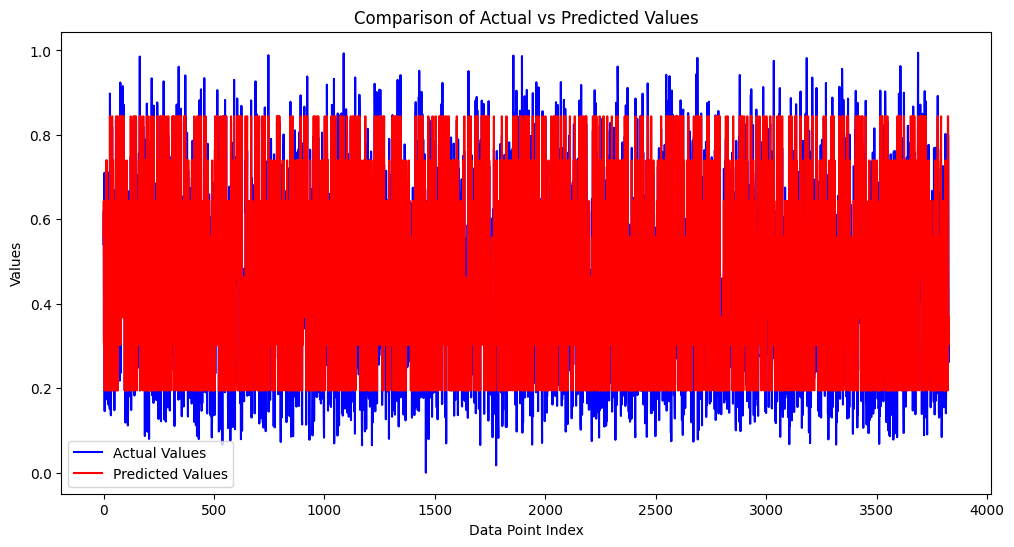

In [ ]:
# Creating a range for the x-axis
x_range = range(len(y_test))

# Plotting the actual values
plt.figure(figsize=(12, 6))
plt.plot(x_range, y_test, 'b-', label='Actual Values')

# Plotting the predicted values
plt.plot(x_range, y_pred, 'r-', label='Predicted Values')

# Adding title and labels
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Values')
plt.legend()

# Showing the plot
plt.show()

In [ ]:
# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared value:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

R-squared value: 0.9077326633644909
Mean Squared Error: 0.004748858361843866
